In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read Six Flags Stock History CSV into DataFrame
dataset = pd.read_csv("ADBL(2013-2023).csv")
print(dataset.head())
print()

  Symbol        Date  Open  High  Low  Close Percent Change  Volume
0   ADBL  2023-03-01   NaN   NaN  NaN    NaN            NaN     NaN
1   ADBL  2023-02-28   NaN   NaN  NaN    NaN            NaN     NaN
2   ADBL  2023-02-27   NaN   NaN  NaN    NaN            NaN     NaN
3   ADBL  2023-02-26   NaN   NaN  NaN    NaN            NaN     NaN
4   ADBL  2023-02-25   NaN   NaN  NaN    NaN            NaN     NaN



In [3]:
# Change Data column into Python Datetime
dataset["Date"] = pd.to_datetime(dataset.Date, format="%Y-%m-%d")
dataset.index = dataset["Date"]

In [4]:
# Create new dataset with only Date and Close price
data = dataset.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(dataset)), columns=["Date", "Close"])
for i in range(0, len(data)):
    new_dataset["Date"][i] = data["Date"][i]
    new_dataset["Close"][i] = data["Close"][i]
new_dataset.head()

,Date,Close
0,2013-02-25 00:00:00,255.0
1,2013-02-26 00:00:00,250.0
2,2013-02-27 00:00:00,250.0
3,2013-02-28 00:00:00,250.0
4,2013-03-03 00:00:00,250.0


In [5]:
new_dataset.tail()

,Date,Close
2280,2023-02-25 00:00:00,NaN
2281,2023-02-26 00:00:00,NaN
2282,2023-02-27 00:00:00,NaN
2283,2023-02-28 00:00:00,NaN
2284,2023-03-01 00:00:00,NaN


In [6]:
# Change dataframe index identifier to data values
new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)

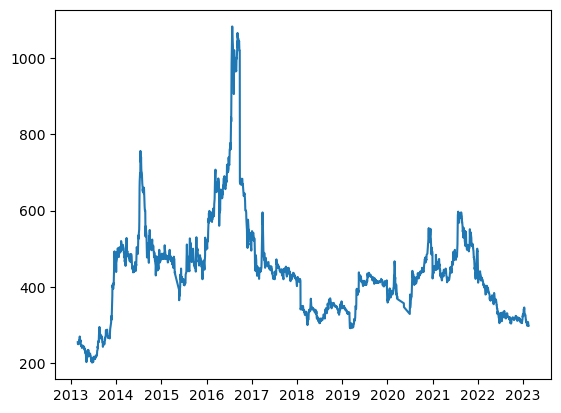

In [9]:
plt.plot(new_dataset.Close)

In [8]:
dataset

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
Date,,,,,,,,
2023-03-01,ADBL,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,ADBL,2023-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-27,ADBL,2023-02-27,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26,ADBL,2023-02-26,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-25,ADBL,2023-02-25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2013-03-03,ADBL,2013-03-03,250.0,255.0,248.0,250.0,0.00,7283.0
2013-02-28,ADBL,2013-02-28,250.0,252.0,249.0,250.0,0.00,9283.0
2013-02-27,ADBL,2013-02-27,250.0,250.0,245.0,250.0,0.00,3682.0


In [11]:
# Split data using an 80:20 split
final_dataset = new_dataset.values
train_data = final_dataset[0:203, :]
valid_data = final_dataset[203:, :]

In [12]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)
x_train = []
y_train = []

In [15]:
for i in range(60, len(train_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

AttributeError: 'numpy.ndarray' object has no attribute 'append'